In [1]:
%%capture
from re import sub
from pandas import DataFrame

from agyw_actif import actif_served as AGYW_ACTIF

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
AGYW_ACTIF.dtypes

id_patient                                         int64
departement                                       object
commune                                           object
nbre_pres_for_inter                                int16
has_comdom_topic                                  object
number_of_condoms_sensibilize                      int16
number_condoms_reception_in_the_interval           int16
number_test_date_in_the_interval                   int16
number_vbg_treatment_date_in_the_interval          int16
number_gynecological_care_date_in_the_interval     int16
number_prep_initiation_date_in_the_interval        int16
age_in_year                                        int64
age_range                                         object
ovc_age                                           object
date_interview                                    object
month_in_program_range                            object
muso                                              object
gardening                      

In [3]:
pipo = list(AGYW_ACTIF.month_in_program_range.unique())
pipo.append("Total")
sorted(list(AGYW_ACTIF.age_range.unique())[0:3])
sorted(pipo)

['10-14', '15-19', '20-24']

['0-6 months', '07-12 months', '13-24 months', '25+ months', 'Total']

In [4]:
list(AGYW_ACTIF.commune.unique())

['Port-au-Prince',
 'Delmas',
 'Carrefour',
 'Cap-Haïtien',
 'Plaine-du-Nord',
 'Limonade',
 'Kenscoff',
 'Tabarre',
 'Pétionville',
 'Gressier',
 'Milot',
 'Dessalines',
 'Verrettes',
 'Liancourt',
 'Saint-Marc',
 'Montrouis',
 "Petite Rivière de l'Artibonite",
 'La Chapelle',
 'Grande Saline',
 'Desdunes',
 'Quartier-Morin']

# Indicator

In [5]:
class AgywPrev:
    """A class with properties and methods given the results of the indicator AGYW_PREV DATIM""" 
    __who_am_I ="DATIM"
    __datim1_title="Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package."
    __datim2_title="Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service."
    __datim3_title="Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services."
    __datim4_title="Number of AGYW that have started a DREAMS service/intervention but have not yet completed it."
    
    def __repr__(self):
        return f"<AgywPrev {self.__i_am}>"
    
    def __str__(self):
        return f"<AgywPrev {self.__i_am}>"
    
    @classmethod
    def datim_titleI(cls):
        return cls.__datim1_title
    
    @classmethod
    def datim_titleII(cls):
        return cls.__datim2_title
    
    @classmethod
    def datim_titleIII(cls):
        return cls.__datim3_title
    
    @classmethod
    def datim_titleIV(cls):
        return cls.__datim4_title
    
    
    def __init__(self,commune=None):
        self.__commune = commune
        self.__i_am = f"{AgywPrev.__who_am_I}"
        self.__data =  AGYW_ACTIF
        self. __total_mastersheet = self.__data.id_patient.count()
        if self.__commune == None:
            self.__dreams_valid = self.__data[(self.__data.age_range !="not_valid_age") & (self.__data.age_range != "25-29")]
        else:
            self.__dreams_valid = self.__data[(self.__data.age_range !="not_valid_age") & (self.__data.age_range != "25-29") &(self.__data.commune == f"{self.__commune}")]
        self.__total_dreams_valid = self.__dreams_valid.id_patient.count()
        self.__dreams_valid["primary_only"] = self.__dreams_valid.apply(lambda df: self.__primFunc(df),axis=1)
        self.__dreams_valid["primary_and_OneSecondary_services"] = self.__dreams_valid.apply(lambda df: self.__primLeastOneSecFunc(df),axis=1)
        self.__dreams_valid["completed_one_service"] = self.__dreams_valid.apply(lambda df: self.__primPartFunc(df),axis=1)
        self.__dreams_valid["has_started_one_service"] = self.__dreams_valid.apply(lambda df: self.__hasStartedFunc(df),axis=1)
        self.__agyw_prevI = self.__dreams_valid[self.__dreams_valid.primary_only == "full_primary_only"]
        self.__agyw_prevII = self.__dreams_valid[self.__dreams_valid.primary_and_OneSecondary_services == "full_primary_leastOneSecondary"]
        self.__agyw_prevIII = self.__dreams_valid[self.__dreams_valid.completed_one_service == "primary_part_services"]  
        self.__agyw_prevIV = self.__dreams_valid[self.__dreams_valid.has_started_one_service == "yes"]  
        self.__agyw_prevI_total = self.__agyw_prevI.id_patient.count()
        self.__agyw_prevII_total = self.__agyw_prevII.id_patient.count()
        self.__agyw_prevIII_total = self.__agyw_prevIII.id_patient.count()
        self.__agyw_prevIV_total = self.__agyw_prevIV.id_patient.count()
        self.__total_datim = self.__agyw_prevI_total + self.__agyw_prevII_total + self.__agyw_prevIII_total + self.__agyw_prevIV_total
        
        
    @property
    def who_am_i(self):
        return self.__i_am
    
    @property
    def data_mastersheet(self):
        return self.__data
    
    @property
    def data_dreams_valid(self):
        return self.__dreams_valid

    @property
    def total_mastersheet(self):
        return self.__total_mastersheet

    @property
    def total_dreams_valid(self):
        return self.__total_dreams_valid
    
    def __primFunc(self,df):
        if (df.ps_1014 == "primary" and df.hts == "no" and df.prep=="no" and df.condom == "no" and df.post_violence_care == "no" and df.socioeco_app == "no" ): 
            return "full_primary_only"
        elif (df.ps_1519 == "primary" and df.hts == "no" and df.prep=="no"  and df.post_violence_care == "no" and df.socioeco_app == "no" ):
            return "full_primary_only"
        elif (df.ps_2024 == "primary" and df.hts == "no" and df.prep=="no"  and df.post_violence_care == "no" and df.socioeco_app == "no" ):
            return "full_primary_only"
        else:
            return "invalid"
    
    def __primLeastOneSecFunc(self,df):
        if (df.ps_1014 == "primary") and (df.hts == "yes" or df.prep=="yes" or df.condom == "yes" or df.post_violence_care == "yes" or df.socioeco_app == "yes" ):
            return "full_primary_leastOneSecondary"
        elif (df.ps_1519 == "primary") and (df.hts == "yes" or df.prep=="yes" or df.post_violence_care == "yes" or df.socioeco_app == "yes" ):
            return "full_primary_leastOneSecondary"
        elif (df.ps_2024 == "primary") and (df.hts == "yes" or df.prep=="yes"  or df.post_violence_care == "yes" or df.socioeco_app == "yes" ):
            return "full_primary_leastOneSecondary"
        else:
            return "invalid"
        
    def __primPartFunc(self,df):
        if (df.age_range=="10-14") and (df.primary_only=="invalid") and (df.primary_and_OneSecondary_services=='invalid') and ((df.hts == "yes" or df.prep=="yes" or df.condom == "yes" or df.post_violence_care == "yes" or df.socioeco_app == "yes" )):
            return "primary_part_services"
        elif (df.age_range == "15-19") and (df.primary_only=="invalid") and (df.primary_and_OneSecondary_services=='invalid') and (df.curriculum=="yes" or df.condom=="yes" or df.hts == "yes" or df.prep=="yes" or df.post_violence_care == "yes" or df.socioeco_app == "yes" ) : 
            return "primary_part_services"
        elif (df.age_range == "20-24") and (df.primary_only=="invalid")and (df.primary_and_OneSecondary_services=='invalid') and(( df.curriculum=="yes" or df.condom=="yes" or df.hts == "yes" or df.prep=="yes"  or df.post_violence_care == "yes" or df.socioeco_app == "yes" )):
            return "primary_part_services"
        else:
            return "invalid"
    
    def __hasStartedFunc(self,df):
        if (df.age_range=="10-14") and (df.primary_only=="invalid") and (df.primary_and_OneSecondary_services=='invalid') and (df.completed_one_service=="invalid"):
            return "yes"
        elif (df.age_range == "15-19") and (df.primary_only=="invalid") and (df.primary_and_OneSecondary_services=='invalid') and (df.completed_one_service=="invalid") : 
            return "yes"
        elif (df.age_range == "20-24") and (df.primary_only=="invalid")and (df.primary_and_OneSecondary_services=='invalid') and (df.completed_one_service=="invalid"):
            return "yes"
        else:
            return "no"
            
    @property
    def total_datimI(self):
        return self.__agyw_prevI_total
    
    @property
    def total_datimII(self):
        return self.__agyw_prevII_total
    
    @property
    def total_datimIII(self):
        return self.__agyw_prevIII_total
    
    @property
    def total_datimIV(self):
        return self.__agyw_prevIV_total
    
    @property
    def total_datim_general(self):
        return self.__total_datim
    
    @property
    def data_agyw_prevI(self):
        return self.__agyw_prevI

    @property
    def data_agyw_prevII(self):
        return self.__agyw_prevII

    @property
    def data_agyw_prevIII(self):
        return self.__agyw_prevIII
    
    @property
    def data_agyw_prevIV(self):
        return self.__agyw_prevIV

    __PERIOD_DATIM = sorted(list(AGYW_ACTIF.month_in_program_range.unique()))
    __PERIOD_DATIM.append("Total")
    __AGE_DATIM = sorted(list(AGYW_ACTIF.age_range.unique())[0:3])
    
    def datim_agyw_prevI(self):
        
        try:
            pivotableI = self.__agyw_prevI.rename(columns={"age_range":"Age", "month_in_program_range":"Time"})
            agyw_prevI_pivot = pivotableI.pivot_table(index="Age",columns="Time", values="id_patient",aggfunc="count",fill_value=0,margins=True,margins_name="Total",dropna=False)[:-1]
            columns_pivotI = list(agyw_prevI_pivot.columns)
            indexes_pivotI = list(agyw_prevI_pivot.index)
            for period in AgywPrev.__PERIOD_DATIM:
                if period not in columns_pivotI:
                    agyw_prevI_pivot[period] = 0
            for age in AgywPrev.__AGE_DATIM:
                if age not in indexes_pivotI:
                    agyw_prevI_pivot.loc[age] = 0
            agyw_prevI_pivot = agyw_prevI_pivot.reindex(index=AgywPrev.__AGE_DATIM, columns =AgywPrev.__PERIOD_DATIM)
            agyw_prevI_pivot_final = agyw_prevI_pivot.reset_index().rename_axis(None, axis=1)
            agyw_prevI_results_final = DataFrame( agyw_prevI_pivot_final.to_records(index=False))
        except ValueError:
            agyw_prevI_results_final = DataFrame({"Age":["10-14","15-19",
                "20-24"],
                "0-6 months":[0,0,0],
                "07-12 months":[0,0,0],
                "13-24 months":[0,0,0],
                "25+ months":[0,0,0],
                "Total":[0,0,0]
            })
        return agyw_prevI_results_final
    
    def datim_agyw_prevII(self):
        try:
            pivotableII = self.__agyw_prevII.rename(columns={"age_range":"Age", "month_in_program_range":"Time"})
            agyw_prevII_pivot = pivotableII.pivot_table(index="Age",columns="Time", values="id_patient",aggfunc="count",fill_value=0,margins=True,margins_name="Total",dropna=False)[:-1]
            columns_pivotII = list(agyw_prevII_pivot.columns)
            indexes_pivotII = list(agyw_prevII_pivot.index)
            for period in AgywPrev.__PERIOD_DATIM:
                if period not in columns_pivotII:
                    agyw_prevII_pivot[period] = 0
            for age in AgywPrev.__AGE_DATIM:
                if age not in indexes_pivotII:
                    agyw_prevII_pivot.loc[age] = 0
            agyw_prevII_pivot = agyw_prevII_pivot.reindex(index=AgywPrev.__AGE_DATIM,columns =AgywPrev.__PERIOD_DATIM)            
            agyw_prevII_pivot_final = agyw_prevII_pivot.reset_index().rename_axis(None, axis=1)
            agyw_prevII_results_final = DataFrame( agyw_prevII_pivot_final.to_records(index=False))
        except ValueError:
            agyw_prevII_results_final = DataFrame({"Age":["10-14", "15-19",
                "20-24"],
                "0-6 months":[0,0,0],
                "07-12 months":[0,0,0],
                "13-24 months":[0,0,0],
                "25+ months":[0,0,0],
                "Total":[0,0,0]
            })
        return agyw_prevII_results_final
    
    def datim_agyw_prevIII(self):
        try:
            pivotableIII = self.__agyw_prevIII.rename(columns={"age_range":"Age", "month_in_program_range":"Time"})
            agyw_prevIII_pivot = pivotableIII.pivot_table(index="Age",columns="Time", values="id_patient",aggfunc="count",fill_value=0,margins=True,margins_name="Total",dropna=False)[:-1]
            columns_pivotIII = list(agyw_prevIII_pivot.columns)
            indexes_pivotIII = list(agyw_prevIII_pivot.index)
            for period in AgywPrev.__PERIOD_DATIM:
                if period not in columns_pivotIII:
                    agyw_prevIII_pivot[period] = 0
            for age in AgywPrev.__AGE_DATIM:
                if age not in indexes_pivotIII:
                    agyw_prevIII_pivot.loc[age] = 0
            agyw_prevIII_pivot = agyw_prevIII_pivot.reindex(index=AgywPrev.__AGE_DATIM,columns =AgywPrev.__PERIOD_DATIM)
            agyw_prevIII_pivot_final = agyw_prevIII_pivot.reset_index().rename_axis(None, axis=1)
            agyw_prevIII_results_final = DataFrame( agyw_prevIII_pivot_final.to_records(index=False))
        except ValueError:
            agyw_prevIII_results_final = DataFrame({"Age":["10-14",                     "15-19",
                "20-24"],
                "0-6 months":[0,0,0],
                "07-12 months":[0,0,0],
                "13-24 months":[0,0,0],
                "25+ months":[0,0,0],
                "Total":[0,0,0]
            })
        return agyw_prevIII_results_final
    
    def datim_agyw_prevIV(self):
        try:
            pivotableIV = self.__agyw_prevIV.rename(columns={"age_range":"Age", "month_in_program_range":"Time"})
            agyw_prevIV_pivot = pivotableIV.pivot_table(index="Age",columns="Time", values="id_patient",aggfunc="count",fill_value=0,margins=True,margins_name="Total",dropna=False)[:-1]
            columns_pivotIII = list(agyw_prevIV_pivot.columns)
            indexes_pivotIII = list(agyw_prevIV_pivot.index)
            for period in AgywPrev.__PERIOD_DATIM:
                if period not in columns_pivotIII:
                    agyw_prevIV_pivot[period] = 0
            for age in AgywPrev.__AGE_DATIM:
                if age not in indexes_pivotIII:
                    agyw_prevIV_pivot.loc[age] = 0
            agyw_prevIV_pivot = agyw_prevIV_pivot.reindex(index=AgywPrev.__AGE_DATIM,columns =AgywPrev.__PERIOD_DATIM)
            agyw_prevIV_pivot_final = agyw_prevIV_pivot.reset_index().rename_axis(None, axis=1)
            agyw_prevIV_results_final = DataFrame( agyw_prevIV_pivot_final.to_records(index=False))
        except ValueError:
            agyw_prevIV_results_final = DataFrame({"Age":["10-14",                     "15-19",
                "20-24"],
                "0-6 months":[0,0,0],
                "07-12 months":[0,0,0],
                "13-24 months":[0,0,0],
                "25+ months":[0,0,0],
                "Total":[0,0,0]
            })
        return agyw_prevIV_results_final

In [6]:
%%capture
datim = AgywPrev()

In [7]:
datim.total_mastersheet 
datim.total_dreams_valid
datim.who_am_i
datim.total_datimI
datim.total_datimII
datim.total_datimIII
datim.total_datimIV
datim.total_datim_general
AgywPrev.datim_titleI()
datim.datim_agyw_prevI()
AgywPrev.datim_titleII()
datim.datim_agyw_prevII()
AgywPrev.datim_titleIII()
datim.datim_agyw_prevIII()
AgywPrev.datim_titleIV()
datim.datim_agyw_prevIV()

19680

19316

'DATIM'

8894

6498

3652

272

19316

'Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,0,306,3730,2017,6053
2,20-24,0,173,1630,1038,2841


'Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,1,363,3927,773,5064
1,15-19,0,99,588,149,836
2,20-24,0,39,494,65,598


'Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,215,57,502,68,842
1,15-19,409,284,781,238,1712
2,20-24,213,297,454,134,1098


'Number of AGYW that have started a DREAMS service/intervention but have not yet completed it.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,3,6,82,5,96
1,15-19,2,2,108,9,121
2,20-24,0,1,48,6,55


# Communes view

In [8]:
%%capture

class AgywPrevCommune(AgywPrev):
    """A class that extend AgywPrev with the purpose of the indicator AGYW_PREV DATIM by commune"""
    __who_am_I ="DATIM"
    def __init__(self,name):
        self.__name = name
        self.__i_am = f"{AgywPrevCommune.__who_am_I} {self.__name}"
        super().__init__(self.__name)
        
    @property
    def who_am_i(self):
        return self.__i_am
    
    def __repr__(self):
        return f"<AgywPrevCommune {self.__i_am}>"
    
    def __str__(self):
        return f"<AgywPrevCommune {self.__i_am}>"
      
        

def name_handler(s):
    s = sub(r"[^\w\s]", '', s)
    # Replace all runs of whitespace with a single dash
    s = sub(r"\s+", '_', s)
    return s

datimcommunes = []

for columns in AGYW_ACTIF.commune.unique():
    globals()[f"datim_{name_handler(columns)}"] = AgywPrevCommune(f"{columns}")
    datimcommunes.append(globals().get(f"datim_{name_handler(columns)}"))


for dcommunes in datimcommunes:
  dcommunes.total_mastersheet 
  dcommunes.total_dreams_valid
  dcommunes.who_am_i
  dcommunes.total_datimI
  dcommunes.total_datimII
  dcommunes.total_datimIII
  dcommunes.total_datimIV
  dcommunes.total_datim_general
  AgywPrevCommune.datim_titleI()
  dcommunes.datim_agyw_prevI()
  AgywPrevCommune.datim_titleII()
  dcommunes.datim_agyw_prevII()
  AgywPrevCommune.datim_titleIII()
  dcommunes.datim_agyw_prevIII()
  AgywPrevCommune.datim_titleIV()
  dcommunes.datim_agyw_prevIV()
  print(" ")
  print(" ")
  print(" ")
  print(" ")
        
        

        

# Verification

In [9]:
datim.data_dreams_valid.to_excel('datim_verification.xlsx',index=False,na_rep="")

# Plot for the indicator

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotnine import *


19316

(<Figure size 1152x576 with 1 Axes>, <AxesSubplot:>)

Text(0.5, 0, '')

Text(0, 0.5, '')

Text(0.5, 0.98, 'AGYW_PREV datim indicator  and the periodic target')

Text(0.0, 9000.0, '18000')

Text(1.0, 9658.0, '19316')

Text(-80, -20, 'source: HIVHaiti')

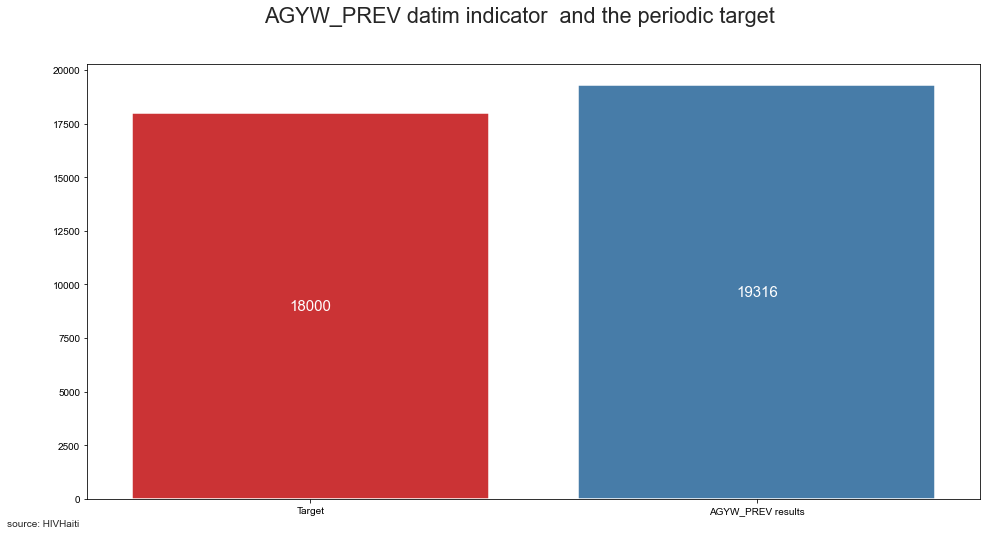

In [11]:



datim.total_datim_general
target= 18000

data_plot = DataFrame({"state":["Target","AGYW_PREV results"],
                            "data": [target,datim.total_datim_general]                        
})


plt.subplots(figsize=(16,8))
sns.set_theme(style="white", context="talk")
sns.set_style("darkgrid")
sns.set_palette("Set1")
splot = sns.barplot(x="state",y="data",data=data_plot)
splot.set_xlabel("")
splot.set_ylabel("")
plt.suptitle("AGYW_PREV datim indicator  and the periodic target")
for p in splot.patches:
    height = p.get_height()
    plt.text(
                p.get_x() + p.get_width()/2, 
                0.5*p.get_height() + p.get_y(),
                '{:1.0f}'.format(height), 
                ha='center', va='center',
                size=15,
                fontdict=dict(color="white",fontsize=15)
            )
    
plt.annotate(
    "source: HIVHaiti",(0,0), (-80,-20), fontsize=10, 
             xycoords='axes fraction', textcoords='offset points', va='top'
)
plt.savefig("agyw_prev_evolution",dpi=1000)

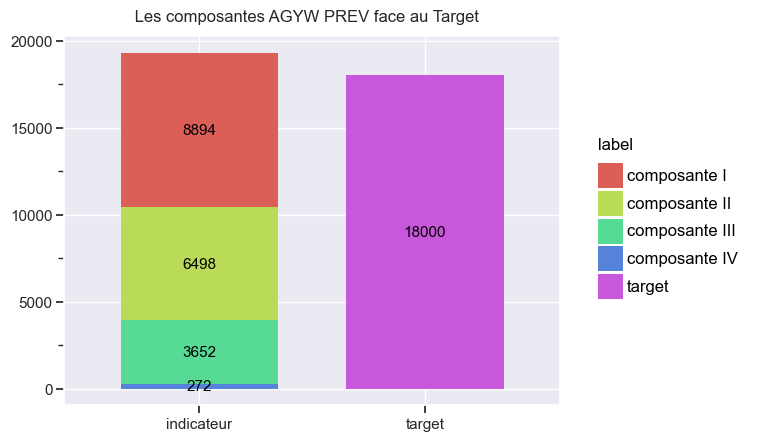

<ggplot: (155215521988)>

C:\Users\Wedner Adrien\AppData\Local\Programs\Python\Python39\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\Wedner Adrien\AppData\Local\Programs\Python\Python39\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: composante_agywprev.png


In [12]:
stack_data = DataFrame( 
                  {     
                        "supp":["target","indicateur","indicateur","indicateur",'indicateur'],
                        "label": ["target","composante I","composante II","composante III", 'composante IV'],
                        "data": [target,datim.total_datimI,
                                datim.total_datimII,
                                datim.total_datimIII,datim.total_datimIV]
                  })

p = (ggplot(stack_data,aes(x="supp",y="data",fill="label",width=0.7)) 
 + geom_bar(position=position_stack(vjust=0.5),stat="identity")
 + geom_text(aes(label="data"),position=position_stack(vjust=0.5))
 + ggtitle(" Les composantes AGYW PREV face au Target")
 + xlab("")
 +ylab("")
 +labs(caption =  "HIVHaiti")
 + theme_seaborn()
)
p
ggsave(plot=p,filename="composante_agywprev.png",dpi=1000)